# <font color=blue>System Identification of a Building Zone Temperature Model: </font>

A discrete time model of a building zone temperature looks like the following equation:

\begin{align}
T(k+1) = ( 1 - p_1 u_1(k) )T(k)  + p_2 u_1(k)u_2(k) + q(k) \nonumber
\end{align}

where $p_1$ and $p_2$ are parameters of the model that we want to identify using a least-squares approach.
In the accompanying $\texttt{etch2169.mat}$ file, we have data for the following measurements of the state and inputs on a certain day:

1. zone temperature $T$ in array $\texttt{RoomTempData}$
2. air mass flow rate $u_1$ in array $\texttt{FanData}$
3. supply air temperature $u_2$ in array $\texttt{SupplyTempData}$


For each of the arrays, the first column represents the actual date and time that the measurement (in the second column) is taken. Note that we have access to fan speed data as opposed to air mass flow rate data.  Assuming that they are equal (up to a constant) is an approximation which does not hold in general, but is okay for our purposes. To determine the parameters $p_1$ and $p_2$, we use a weekend day and assume that the heat load $q(k)$ is zero (when there are typically few graduate students in the lab to add heat to the system). Specifically, follow these steps:

The dates and times that are stored in the first column of each array mentioned above are in the format of $\textit{serial date numbers}$. Serial date numbers represent a calendar date as the number of days that have passed since a fixed base date of January 1, 0000 A.D.. Note that the measurements were not taken at the exact same times; they are each off by a few seconds from another. Now we use the function $\texttt{datenum}$ to convert the date character back into the serial date number format. Furthermore, we use $\texttt{datenum}$ to determine a sampling time $\texttt{TS}$ of 1 minute in serial date number format.
Note that 1min corresponds to the real number 0.0006944444030523. Finally, we create a vector of serial date numbers from 10:01:00 AM to 3:59:00 PM on Sep. 9, 2018. The downloaded data contains the day's measurements from between 10 AM and 4 PM.

In [1]:
#@title # Run this cell to generate `etch2169.mat`
#@markdown *DO NOT MODIFY THIS CELL* 

data = b"""
TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IE1BQ0k2NCwgQ3JlYXRlZCBvbjogVHVlIFNl
cCAxMSAyMjo0NjowMCAyMDE4ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAAAAAAAAAAAAABSU0PAAAA6wcAAHicvZZ5cBRVHscbkCMygFxZQI4QZAAxBBjCESB0JzHMTIIR
IiqewaKi67peAVnLtRbPpdzout4ptMAr3pYa74vgUV5ZlmIVCYIILOFQDkkIIUDY3+/b38fMa7H8
Q8upoj68me73Xn/6299OV8dx3kx1nA7CTo5P/bTn+LI2jtNWKHA6yr+CuVfmz50/10mR/y+S85an
3v2Vuyjs9XxoB5iWXrBGuWrYo+Apz7SAYyLnfK3cNPEV8J6cLmuVSz/9I/jAxyvAgi/61ylLZl8P
lm78Cny1NHOdcl7ZHeCb27aAH1/jfqNcfehh8OY2zeCam2euV96++Hnw3h4pG5T5feaBD1a+B0aX
9vlW2fxEOfj0syvB18aN3Kh8Ycwt4IUTvgUvX5H9nbLfJ/eDX9TuBQeeEd+k/E/Jk+D6DW02K7df
ehH43bzXwbsv775F+Ujjn8EZLZ+C59069H/KF9v/DWz797Vgt+5ZW5XiGbyq//fgh4/k1yvnP74U
3PDykXp63qa87dWXttHzdmVu/mXgvtiH4OPFA3coD6xaCLY7/8sd9LxTuWLnP8BeV2zdSc/fK/s2
VILhG5vAsR1LflCeesJz4LqUDruU2+69BGwcsHwXPe9WLkm7FiwK/xuc89KIPcqU128FU91Ne+h5
Lz3vpWfwhtWFPypHrq0CJ17Sbp+yYssF4JQdb4C7dvdooOcGem6g50Z6Bi/qvK6RnvfT8356Bv9a
Nb2JnpuY5yZ6PsA8H6DnZnpupudmej7IPB9kng/Scwvz3ELP4OAm75BywcIl4GfNjYeY58PM82Hm
+Qg9H2Gej9Bzq3L2iAWtzHMrPR9lnsHyjzYfpWfHEy4sfBAUz6B4buP5nkHJc1tl5sXng5JnMFbe
q53newbFM9h6dMgJylk33Qi+889vwD/dP76953sGxTMovdFBKb0B3pRxGBTPHT0/z+DuD7p2Ukpv
gOIZlN5I8XzPoOQZFM8nen6eQekNUPLc2fM9g9IboHgOeX6ewQl3deyilN4AxTMonrsqpTdA8QyK
526en2fwrXc2guL5JM/PMzhs5j5QeqO7UnqjOz338Pw8g5JnUPLcU9nyl6t60nNPeu7l+XnuRc/g
KxWR3sr+S/7Vm55B6Y1Uz89zKj2Dd75x7h88P89g1tud+3h+nvvQMyh57kvP4FNrVoPnrM/oR8/g
yvnb+9HzyfQMSm+cTM/9PT/PoPTGAM/P8wB6HkDPA+kZbJ+5aiA9D1KWZd8OSm8Mouc05fu596Ux
z2nM82DmeTA9p9NzOj2n0/MQegZ/XPAJ+OgN6afQMyi9AUpvDGWeQXkPDmWew8qM5x8DpTfCzPMw
Zc571aD0xnDmeTg9D2eeR9AzKL0xgnk+VSm9AV6ztx6U3hiplPcgKL0BXt9afJpyS+jF05jnDHrO
oOcMeh6lfPmF60Yxz6PoOZOeM5nnTHoerZTeGE3Po5nnMcrFFzwNSj+PpWdQemMsPUeU0hsR5jnC
PI+j53H0PI6es5jnLHrOoufxSukNUN6D4+l5Aj1PoOeJzPNEegaP/nfQJKW8B0HpjUn0nM08g9LP
2czzZOZ5MvM8mXmeopTemELPU+kZlPcg+MSQfjnMcw4959DzNKX0xjR6Bod8PtVVSm+49Ax+ffYM
Tym94THPufScyzzn0nOe0r36ijzmOY+e8+k5n57z6fl05hmU3gDlPVjAPIPSGwX0PJ2ep9NzVLl1
eRlYvPKjKD3HmOcY8xyj57iy0+bFcXqOM8+F9FxIz4X0XKSU3iii5xnKO7rNBSf3fncG83wGPYPS
G+DhkcOL6bmYnouZ5zOV0hvgldE9oPTGTKX0xkzmeRY9z2KeZ9FziVJ6o4R5BqU3zqJnUPoZlPfg
bKX8Ge1GIoWucFnlHFD+sLbGNbUhsggsLSsjw6AbqbaOW1ZZeVya881xpWX1cf/88sJkyhHx5N/N
OvLh+bVxe1/+WNaxzgseZ36XffD4ujiv1zrerJOYL8x1KqzjDcVHgGH+7prriifTrLussq91nnzM
efx9jrWv0rIq63dzHWZe8705LrFutbUvGceS10/M0xCz5w/F7eNC1nGyP3O8NZZ1yLIY90FGrN+D
x5uxeOe8NWafHC/iuC5GL7Hk/cj88eTzEtdZZ80r+bDWM/sz68h8Uc4fpc8o14/yPP5edNxxghVR
zm/NF/xe9sVxdfR468v+o8me5GP5lfvyM57ssaFcf9SeJzhvPfcRsXwYD7KutU+zb3Pd5neZl9+H
zPVMT6bsh+MKjp1Jv4ay70nct8t95Pnj8oLkdWRs7UPO4/pu1KZjUeYN3L/qQD5c63oTnsoDx9db
9zXx/PS17oPxb44z+TXHGQbvnzk+mCPnp/fXouz3N7kPv0TJSTa9uP73NXncdwHHvC/hwP5rAr5r
LJ+J5yX4HIf4nBRZvWF6wowTveMedyz33ZrHPE9J81o+ZR/mPv8uXg0lZ1O5bh73z/wXmX1YOTX5
TOS3wspv4rpMD4St3CWef9OX4eD5vJ9V1n01fn7pemQeM3Z5Xfk+5zAvdo8Y38GeNXkxfesce17s
584JPH8mP8FeTOQuZPJk5THx/JveKAr2yu+SB+fYc1c71R+7udwXc1Fb4Huos/IR9JZ47kyPVFm9
Zo4LvueC3s335r3pHMtj7W/ynMg67Jdq9ot7evJ1So6ZE5O/RYH3e12gN0JWHqxe+T+wKJkoDwAA
AJUGAAB4nK2WC0xVdRzHDxr4IlJBfCAv5a0ScBF5iNwjIiIiz5yZGWpiZgw1K2fOMcuszDnnrCh1
zJw5tZxjzpw9yJw5R5kxNfL9QkVFFEWuiPT7/c73zu6Bw72obHefncu599z/53zu73/dFEUp91QU
F2JXRSP/OeP4DSdF6UQkKK70yCkqKsybVThvzPSF0/m8bvQoptdv+2TlMXNxkNrc/bKw+zr1OHPf
V+uFbgMbhF5bck4wK7Z/J1yyq+s/zKF7ZgqLY38SRo7qV8VMPLRQOD7nqHBjZdi/zDt5Hwo3TTkr
3Hkp4SQzv+Zz4VsL64Xl9yacYs5v+lbo79T5NPOoyzRh4Md7hFG9Pc4wL/QtEq71PixMHhx4lvnF
5qXC1G1VwrzomHNM5/g1wt1JN4Tdfk05z9x7sFR4MKtZ+O6kyReYh0/sEvq83OMic8XsOcLYwgPC
qwt8LzFH3l0kvGGpFFo+iLjMJM+X4Vn4fU9zNXOa59fCuaX3q+H5CrMoeIfwt63OV+FZePrHn4Wr
9ve/xjyf/Law9o8j1+C5hrn91RXCljPnauD5OrNzwTphz7rbQu/FE28wPd7bIjywxOkmPAuXue69
Cc+1zI/WFgpjSg7VwvMtZn1IsXBz+Mlb8FwHz3XwLJyVknqb6Zm+6TY8Cwf8PekOM3hqmfDEdLd6
5pCLs+vhuR6e7zK/XLRYmLb0mHBDS/g9eBZOWV19Dz03wHMDPDfA8330fB89NzL/iprRCM+N8GxB
zxZ4tsDzA/T8AJ4fwHMTem6C5yb0/BA9P0TPzfDcjJ6b4fkRen6Enh/Bcwt6Fiplp1rgWVE1z8LJ
+2qE5NlJ1TwLybOQPHdStZ6F5LmzqvUsJM9C8vycqvUsJM9C6tlZ1TwLqWch9ezCpLkhJM/CX/yz
u6haz0Ly3FXVehaSZyHNjW6q1rOQPAvJc3dmZtVyIc0NIXnuoWqeheRZSJ5dVa1nIfX8PDN85WtC
6ll4fFVvN1XzLCTPQvL8gqr1LKSehY07o3vCs5B6FtLc6MWkudELnoU0N3qrWs/C90+7usOzOzy7
w7OHqvXsAc9C6rkPPAup5z7w7KlqPQtpPgup576q1rPQd1iXfqrWcz94FlLP/VWtZ+GatD+FozND
BzBpbgipZ2FufrwXPHvBsxc8D1S1ngfCszfznWVTveFZSD37wLMPPPvAsy88+8KzLzz7MbfuXu0H
z37o2R89C+dUNPnD8yB4HoSeBzMvXX9TePLqfuFntd4B8BwAzwHoORCeA9GzkOZGEHoOgmfhjA2Z
wfAcjJ5D0LOQ9sEQ9BwKz6HoORQ9h6HnMHgOQ89D4FlYNrdO+Pr89KHwLKS5MYxJc0NIc2MYPIcz
k9bPC4fncHh+EZ6FtA8KaW5EoGchzY0I9BzJXHDkm0j0HAnPUUyaG1HwbELPJvRsQs/R8BwNz9Hw
PByeh8PzcHiOgWfh7wGWGPQ8Ap5HwHMsPMei51j0HMekuREHz3HwHA/P8fAcD88J8JyAnhPQ80gm
zY2R8JwIz4noORGeRzFpHxTSPjgKnpPgOQk9J8GzGZ7N6NmMnlUmzQ0VnlV4Ho2eR8NzMpP2wWT0
nAzPY+BZSL83hDQ3UpgZzp8KaW6kwPNYJs2Nseh5LDynMkMidqbC8zgmzY1x8DwOntPQcxo8p8Hz
eCbtg8JXZl4Qus5JTIfndHhOh+cJ6HkCPGcwaW5koOcMeJ7IpLkxET0Lr2wcnMmkfTATnoW7fhiR
Bc9Z6DkLnrOZNDey4TkbnnPQcw485zJpbuSiZyHNjTx4zkPPeej5JSb9jC4t2Ztj/h/ph7kwv+Bg
h2g2leF4i82x9X2tx/rn7V3PbKrE+VU2x/rn9a8zen/rcXlFhQ3176enopxrl/rz7a3HaF1G180v
qHaIZlN9u2x9XqWBlx1t3k8rje7bs1qH/nOWllgcIv3ltkXr/1t7qGyzD/369OvS3/+nXYfR584v
cHGI5RWuNsdmk/tTsbSkf7vUX1/vtaN96j04um79evUe9P/Xr0NR/NpkfkFQm8f2aDaZbKh/vrxi
aJvnWVlaEucQW7/O9r5YfVq9W7/X9uaN/j4pDvZorx97njvKp/VHr3DovMfXddF5sJ0f+jnSej+q
avf70FG/es9Gfh31beSzdcfubfrQ92alve/1k3bjaD/21vWk37vH88F2/db9QP+7Qk/9vmG0HxjN
+Y52oPfyrOaaldbrG81ho/XZW7fReo3W/azniVEncvwf+ea6qQ8AAAC/BwAAeJytlglQVVUYx68b
oREuKEpkoiIiIqKAiIi8K4IIyHssWlQWjiNmqZGa49IY5ag56lhZjpjj0KZjjplhpeU4jGO04ThG
argQuaDiSk9EVvvOd//H67k8xpzxzTA/7naW3/mf715PTdOKvDXNjeiuGRS/Djh+uY2mtSUSNE/6
y3gjN3fWoszps3PHTZ0/VdM60rk88bzn2mO2vAD9uXWVzBk+cccFe/bZwny1oJa5MCjzhGBg6C5m
WUSnvwRXRU9nntl/gLn2oE+Z4KaUBcxtx/9gNjwTfFJwx5SVzLvlFUyPmTGnBPfP2cicNd/J7L04
9bTg4be2M5cub39GMGT1S8x3PPYx123oUS4YuzmXeeOT35mNgwP/FnQG5jE/DznFzAwfUSE49cAH
zK6HrjGnx4//R9A7+VNm/2PNzNKTWWcFB75QyFxyxuOc4PkrrzA/rP6JGV/rd16wpnEJc8LSY8zJ
7sMvCJLnC/DM7PSRXin446bNzJ/96yrh+aJgyY6dzDd3u1+CZ2aUXsSsSvC9LBjzy3xmUvrRy/Bc
Jeh+9l3m89POVsHzFcHsqg1X4Jm5qNl+VfD1hm3Mvm3aXYNnZvl7P1yD5+uCZ3u+xlzf+zdmXP8B
NwQdO99maoWnmbv3Rt6E55vwzDz4a2K14Nwjn1XDczU8/yu4rGIPM7yysxOemSNnH3LC8y14vgXP
t+C5Bp6Z33ldqkGeb8PzbeT5NjzXIs+1yPMdweDvp92B5zvwXIc818FzHTzXC9rLltfDcz08NyDP
zC43qxuQ50bkuRF5boLnJuS5CZ6bkedm5JlZsC3gLvLMnBJZfheeNd3wzPw29iqT8txGNzwzyTNz
weRn2+pGnpnkuZ1ueGZSnpmX5vZpL7hx4WLmF21PMMlzB93wzKQ8M8mzmyDVDSblmem7Nf0x3cgz
kzy760aemeSZSXWjo27kmUmemeS5kyDVDSbVDSZ5flw3PDMpz0zy7KEbeWaS5yd0wzOT8swc3q27
p254ZlKemeS5s27kmUl5ZlLd6ALPzDmJN7rAc1fBfcUFzGJHE5Py3E038twNnr3g2QuemZTn7vDc
HZ6ZdctCe8Azk/LMpLrhrRt59oZn5p9fTeqpG3lmUt3opRt57gXPTMqzj27kmXn98BHmltKgJwWp
bjD3XjzH3HU+2heemZRnX3h+SjfyzKS60VvwqNuLTMozk/L8NDwzKc9Pw3MfeO4Dz0zKs59gh1Hv
M6luMKlu9EWe+yLPfeG5H/LcD577wzOT6kZ/5NlfkOqGPzz7I88D4HkA8jwAeQ5AnplUNwKQ54Hw
PBB5DkSeA+E5EHkeBM+DkOdByHMQ8sykuhGEPA8W9HHmD4ZnZlFNSjA8ByPPQ5DnIcjzEHgOEfzY
b24IPIfA81B4HgrPQ+E5FHlmUt0IRZ6HwfMweB4Gz8PheTg8h8FzGPIchjyHw3M4PIfDcwQ8R8Bz
BDyPgGem//Z6JtXnSHiOhOeR8DwSnkciz1GCVDei4DkKnkfB8yh4HgXP0cgzk+pGNPI8WpDqxmh4
joHnGHiOgecxgvQeZFLdGAPPsfAcC8+x8GyDZxvybEOedUH63tDhWYfnsYJUN8bCc5zgyhkz45Dn
OHgeB8/j4JlJdSNe8MtVq5lUN+LhOUGQ6kYC8pwAz+MFl+/5ejw8JwpS3UiE50R4noA8T4DnCfCc
JEjvwSR4ToLnZHhORp6TkecU5DkFnicKUt1gUt2YCM+pglQ3UpFnJn1v2AXpPWiHZzs8OwSpbjiQ
Zwc8pyHPafCcBs/pyHM6PGcI2nJnZSDPTKobmfCcCc/Mb9aETeL+NS07JyHNRizIz2LSGTBPOV+Q
H+Ww8f2VqYJFJWsUZudsZdrCnPLYbhyHOQyudxjtVjiM9nzSbPf1n52TA65Af/lpeA7ni9FOod1o
R7Mb/ZekGveXYTwp8jr6yZLPgU7MIwDtZ6C/RZb+tuL8PpwvBL0UH+TJrvabp/RP88N9BdIfjv2U
+dvC5rnsn1pWfEhPcp3kuFveX6asozkOwxu1l3o/5frJ66Znm8vxS39mbvIs61Yo1w3HpbivAucr
cd6J5+qU6+bzK5R50n9Ku7Kd7By39Ptp5ssN47cpudHu5ScF83XCi5oXGhcY5TKnrXm3zo9+yvgo
R3Kc6cZ1P1wPsNxXqszXXFdNed76nBxPyzy7fp72KZ6zoZ0EHN9bL+lR5kDuP/jzgrcMXN/qMi8y
t9KfNSct51lhWefWcuPar9UrraMyPxovzmfh/myFsh0zx4UuPZr+1XbleXMc6rrK+mLOW87HT1kP
OT7Zr6yntN9knbWjP+WY6jPy7od1WKHUYbku1lzLfSbnK/NkXZ+HzbnpyfV6SO80HoUyn+Z9NqUf
k5Uu89JaflruNyf8FCl1Qr73tHv100fxS+0ofmXuadxKnZR1/kGeW6uXD5v3lvs52+J1HtZhkbIe
dEXuV2W/y7zJfS/nTfUfeSxzmavW6racj3UdH1QfrbmR+0POyzyW7RZbciz791E8WeuAuV4Bynuk
qMRDyYG57+Yp9ZC8uvQivztMP+r70/r98aj2XVFJsDJfWacenIs6mUv5HYH55MjvBOV9KvNh/X6Q
71Pzu2/FI53n/82JOd+AdLX9Ckt/ah02vVE9+g9Dyq4G
"""

import base64 
data = base64.b64decode(data) 
with open('etch2169.mat', 'wb') as f:
  f.write(data)
del data
!md5sum etch2169.mat

4ac0be8f8c1e9c7e543a0329f84b5953  etch2169.mat


In [2]:
from scipy.io import loadmat


Data = loadmat('etch2169.mat')
RoomTempData = Data['RoomTempData']
FanData = Data['FanData']
SupplyTempData = Data['SupplyTempData']

In [4]:
from datetime import date
from datetime import datetime as dt
import numpy as np

# datemun is a function which....
def datenum(d):
    return 366 + d.toordinal() + (d - dt.fromordinal(d.toordinal())).total_seconds()/(24*60*60)

d_start = dt.strptime('2018-9-9 10:1','%Y-%m-%d %H:%M')
d_end = dt.strptime('2018-9-9 15:59','%Y-%m-%d %H:%M')
d_start_plus_onemin = dt.strptime('2018-9-9 10:2','%Y-%m-%d %H:%M')

TS = datenum(d_start_plus_onemin) - datenum(d_start)
TimeQuery = np.arange(start=datenum(d_start), stop=datenum(d_end), step=TS)

$\textbf{Part (a)}$

Verify using *np.diff* and *np.histogram* that the data is nearly collected with uniform sample time, but that there is a few percent variability.

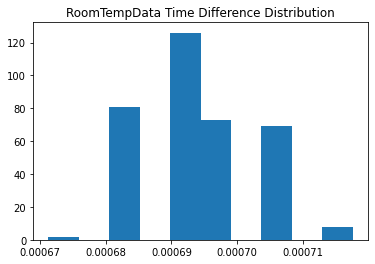

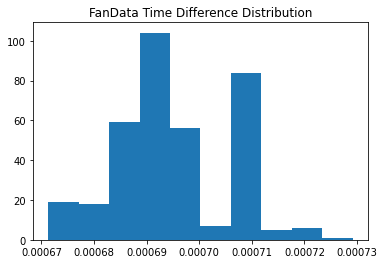

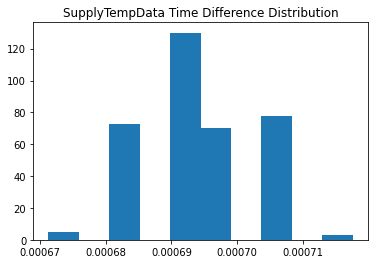

In [15]:
import matplotlib.pyplot as plt

TimeDiff_RoomTemp = np.diff(RoomTempData[:,0])
TimeDiff_Fan = np.diff(FanData[:,0])
TimeDiff_SupplyTemp = np.diff(SupplyTempData[:,0])

plt.figure(0)
plt.hist(TimeDiff_RoomTemp)
plt.title('RoomTempData Time Difference Distribution')
plt.figure(1)
plt.hist(TimeDiff_Fan)
plt.title('FanData Time Difference Distribution')
plt.figure(2)
plt.hist(TimeDiff_SupplyTemp)
plt.title('SupplyTempData Time Difference Distribution')

plt.show()

$\textbf{Part (b)}$

Next we are going to interpolate the data points to obtain two effects 
1- remove outliers/filter the data, 2- call the interpolated fucntion so that  the new data is sampled exactly every minute (start at 10:01 AM, then 10:02 AM, etc. till 3:59 PM).

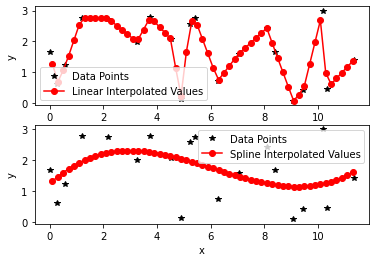

In [16]:
from scipy import interpolate

xData = np.cumsum(np.hstack([np.zeros((1,)), 0.1+np.random.rand(19,)]))
yTmp = np.hstack([np.sort(3*np.random.rand(10,1)), np.fliplr(np.sort(3*np.random.rand(10,1)))])
yData = yTmp.flatten()
xQuery = np.arange(start=0.1, stop=np.max(xData), step=0.2)

f_interp = interpolate.interp1d(xData, yData, 'linear')
yInterpLinear = f_interp(xQuery)

f_spline = interpolate.UnivariateSpline(xData, yData)
yInterpSpline = f_spline(xQuery)

plt.subplot(2,1,1)
plt.plot(xData, yData, 'k*', xQuery, yInterpLinear, '-or')
plt.legend(['Data Points', 'Linear Interpolated Values'])
plt.ylabel('y')
plt.subplot(2,1,2)
plt.plot(xData, yData, 'k*', xQuery, yInterpSpline, '-or')
plt.legend(['Data Points', 'Spline Interpolated Values'])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Plot and compare the linear- and spline-interpolated values to the actual data. 

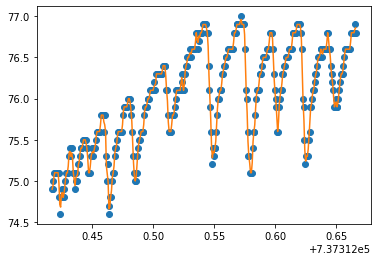

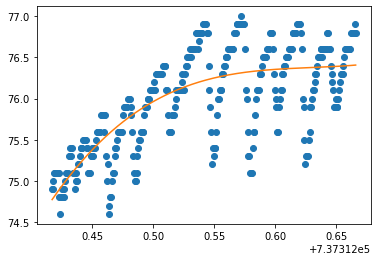

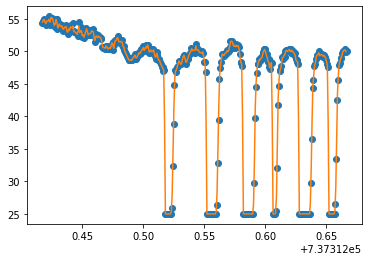

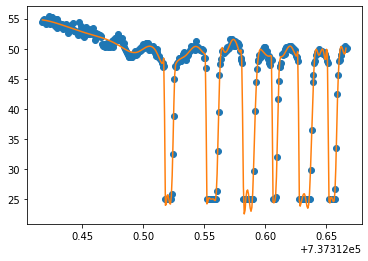

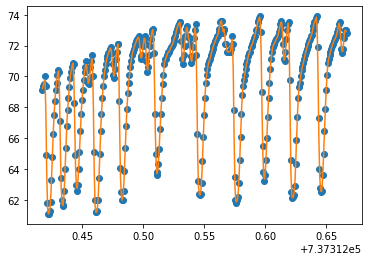

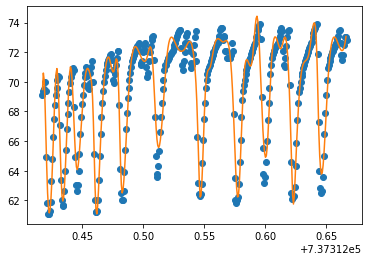

In [17]:
from scipy import interpolate

# xData
time_T = RoomTempData[:,0]
time_u1 = FanData[:,0]
time_u2 = SupplyTempData[:,0]

# yData
data_T = RoomTempData[:,1]
data_u1 = FanData[:,1]
data_u2 = SupplyTempData[:,1]

# linear Interpolation
T_interp = interpolate.interp1d(time_T, data_T, 'linear')
Tlinear = T_interp(TimeQuery)
u1_interp = interpolate.interp1d(time_u1, data_u1, 'linear')
u1linear = u1_interp(TimeQuery)
u2_interp = interpolate.interp1d(time_u2, data_u2, 'linear')
u2linear = u2_interp(TimeQuery)

                                      

# Spline Interpolation
T_spline = interpolate.UnivariateSpline(time_T, data_T)
Tspline = T_spline(TimeQuery)
u1_spline = interpolate.UnivariateSpline(time_u1, data_u1)
u1spline = u1_spline(TimeQuery)
u2_spline = interpolate.UnivariateSpline(time_u2, data_u2)
u2spline = u2_spline(TimeQuery)

# T Plot
plt.figure(0)
plt.plot(time_T, data_T, 'o', TimeQuery, Tlinear, '-')
plt.figure(1)
plt.plot(time_T, data_T, 'o', TimeQuery, Tspline, '-')

# u1 Plot
plt.figure(2)
plt.plot(time_u1, data_u1, 'o', TimeQuery, u1linear, '-')
plt.figure(3)
plt.plot(time_u1, data_u1, 'o', TimeQuery, u1spline, '-')

#u2 Plot
plt.figure(4)
plt.plot(time_u2, data_u2, 'o', TimeQuery, u2linear, '-')
plt.figure(5)
plt.plot(time_u2, data_u2, 'o', TimeQuery, u2spline, '-')

plt.show()

$\textbf{Part (c)}$

To do least squares parameter estimation, we want to solve the following problem:
\begin{align}
\min_{p_1,p_2,e}&\: \sum_{k=0}^{N-1} \|e(k)\|_2^2 \\
\text{s.t. } &T_{data}(k+1) = (1 - p_1 u_1(k))T_{data}(k)  + p_2 u_1(k)u_2(k) + q(k) + e(k) \\
& \forall k = \left\{0,\ldots,N-1\right\} 
\end{align} 
where N is the number of data samples used, $T_{data}$, $u_1$, and $u_2$ represent the interpolated data, and $e(k)$ is the one step model estimation error of the temperature, whose norm (over time) is minimized by proper
choice of parameters.   Populate the appropriate matrices $A$ and $b$ using the known data such that

\begin{align}
\left[ \begin{array}{c}
e(0) \\ \vdots \\ e(N-1) \end{array} \right] = A p - b
\end{align}

where $A \in \mathbb{R}^{N \times 2},  b\in \mathbb{R}^{N}$ and $p$ is the $2 \times 1$ unknown parameter vector.
Perform the least squares estimation of the parameters using $\texttt{cvxopt.solvers.qp}$.   Implement this code in a function

`def bldgIdentification(Tdata, u1Seq, u2Seq):
    return estParm`

In [18]:
import numpy as np
import cvxopt
from cvxopt import matrix, solvers

N = 358

def bldgIdentification(Tdata, u1Seq, u2Seq):
  A = np.empty([N,2])
  for i in range(N):
    A[i,0] = u1Seq[i]*Tdata[i]
    A[i,1] = -u1Seq[i]*u2Seq[i]
    
  b = np.empty(shape=[N,1])
  for i in range(N):
    b[i,0] = Tdata[i]-Tdata[i+1]
      
  P = 2*A.T @ A
  q = (-2)*A.T @ b
    
  P = cvxopt.matrix(P, tc='d')
  q = cvxopt.matrix(q, tc='d')
    
  estParm = cvxopt.solvers.qp(P,q)
  
  return estParm

estParm = bldgIdentification(Tlinear, u1linear, u2linear)

print('p1=',estParm['x'][0])
print('p2=',estParm['x'][1])



p1= 0.0003985464819195653
p2= 0.00043818724755873646


$\textbf{Part (d)}$

The input arguments $\texttt{u1Seq}$ and $\texttt{u2Seq}$ are of length $N$, while $\texttt{Tdata}$ has length $N+1$.  The code should
formulate and solve the least squares problem, and return the parameter estimate as a $2 \times 1$ vector.

See how predictive the model is over a long horizon. On a single figure, plot the day's actual Temperature data from 10 AM to 4 PM. Compute and plot $T_{est}$ by  propagating the the model forward as follows:
\begin{align*}
T_{est}(0) &= T_{actual}(0) \\
T_{est}(k+1) &= (1 - p_1 u_1(k))T_{est}(k)  + p_2 u_1(k)u_2(k) + q(k) 
\end{align*}
using the values for $p_1$ and $p_2$ as obtained by the least-squares solution.

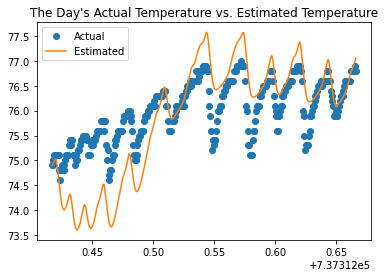

In [19]:
p1 = estParm['x'][0]
p2 = estParm['x'][1]

T_est = np.empty([N+1,1])
T_est[0] = Tlinear[0]
for i in range(1,N+1):
  T_est[i] = (1-p1*u1linear[i-1])*T_est[i-1]+p2*u1linear[i-1]*u2linear[i-1]

plt.plot(time_T, data_T, 'o', TimeQuery, T_est, '-')
plt.title("The Day's Actual Temperature vs. Estimated Temperature")
plt.legend(["Actual","Estimated"])

plt.show()